Rotation 45°:
Matrix:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Original v = [1.  0.5]
Transformed v' = [0.35355339 1.06066017]
Length orig = 1.1180, length trans = 1.1180



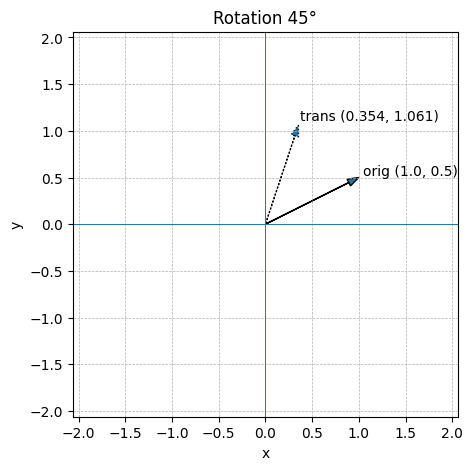

Scale (2, 0.5):
Matrix:
[[2.  0. ]
 [0.  0.5]]
Original v = [1.  0.5]
Transformed v' = [2.   0.25]
Length orig = 1.1180, length trans = 2.0156



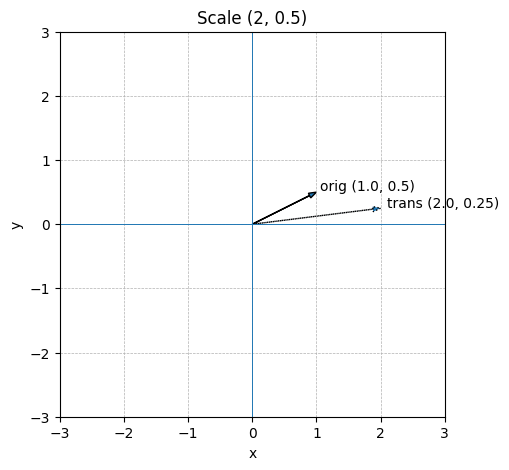

Shear (x by y):
Matrix:
[[1. 1.]
 [0. 1.]]
Original v = [1.  0.5]
Transformed v' = [1.5 0.5]
Length orig = 1.1180, length trans = 1.5811



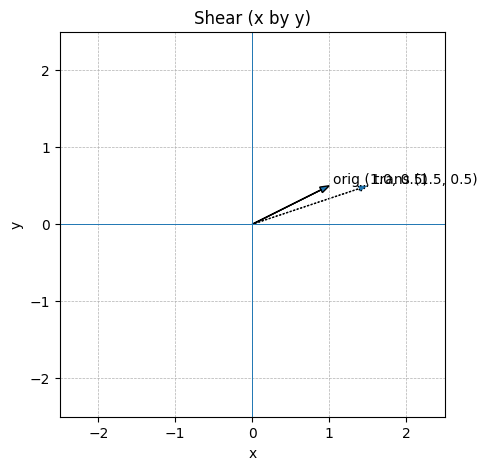

Reflect across x-axis:
Matrix:
[[ 1.  0.]
 [ 0. -1.]]
Original v = [1.  0.5]
Transformed v' = [ 1.  -0.5]
Length orig = 1.1180, length trans = 1.1180



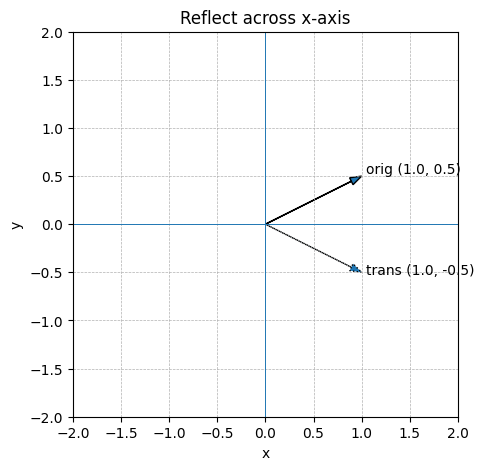

Projection onto x-axis:
Matrix:
[[1. 0.]
 [0. 0.]]
Original v = [1.  0.5]
Transformed v' = [1. 0.]
Length orig = 1.1180, length trans = 1.0000



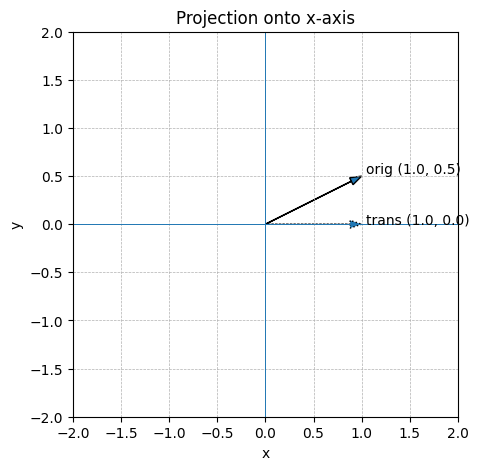

Rotation 45° + Uniform scale 1.5:
Matrix:
[[ 1.06066017 -1.06066017]
 [ 1.06066017  1.06066017]]
Original v = [1.  0.5]
Transformed v' = [0.53033009 1.59099026]
Length orig = 1.1180, length trans = 1.6771



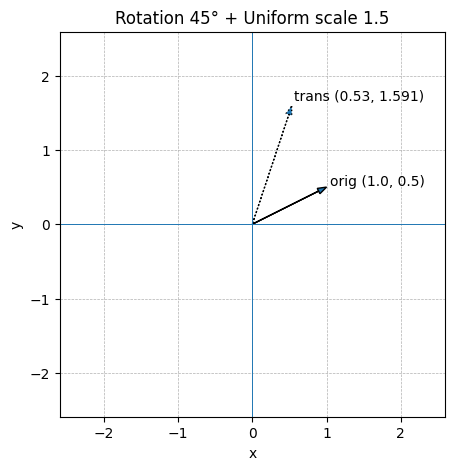

Summary (name, transformed vector, norm of transformed):
- Rotation 45°: v' = (0.3536, 1.0607), ||v'|| = 1.1180
- Scale (2, 0.5): v' = (2.0, 0.25), ||v'|| = 2.0156
- Shear (x by y): v' = (1.5, 0.5), ||v'|| = 1.5811
- Reflect across x-axis: v' = (1.0, -0.5), ||v'|| = 1.1180
- Projection onto x-axis: v' = (1.0, 0.0), ||v'|| = 1.0000
- Rotation 45° + Uniform scale 1.5: v' = (0.5303, 1.591), ||v'|| = 1.6771


In [3]:
# Python code to demonstrate several 2D linear transformations applied to a position vector.
# This will print transformed vectors and produce one plot per transformation showing:
# - original vector (arrow from origin)
# - transformed vector (arrow from origin)
# Rules: uses matplotlib (no seaborn), each chart is its own figure, no explicit colors set.

import numpy as np
import matplotlib.pyplot as plt

# base position vector (column)
v = np.array([1.0, 0.5])

# helper to draw arrows nicely
def plot_vector_pair(v_orig, v_trans, title):
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    ax.set_aspect('equal', 'box')
    max_coord = max(np.abs(np.concatenate([v_orig, v_trans]))) + 1.0
    ax.set_xlim(-max_coord, max_coord)
    ax.set_ylim(-max_coord, max_coord)
    ax.grid(True, linestyle='--', linewidth=0.5)
    # origin
    ax.axhline(0, linewidth=0.7)
    ax.axvline(0, linewidth=0.7)
    # plot original vector
    ax.arrow(0, 0, v_orig[0], v_orig[1], head_width=0.08, head_length=0.12, length_includes_head=True)
    # plot transformed vector
    ax.arrow(0, 0, v_trans[0], v_trans[1], head_width=0.08, head_length=0.12, length_includes_head=True, linestyle=':')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # annotate endpoints
    ax.text(v_orig[0]*1.05, v_orig[1]*1.05, f'orig {tuple(v_orig.round(3))}')
    ax.text(v_trans[0]*1.05, v_trans[1]*1.05, f'trans {tuple(v_trans.round(3))}')
    plt.show()

# Define transformations (2x2 matrices)
theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])      # Rotation by 45°

S = np.array([[2.0, 0.0],
              [0.0, 0.5]])                         # Non-uniform scaling (x by 2, y by 0.5)

Shear = np.array([[1.0, 1.0],
                  [0.0, 1.0]])                      # Shear in x-direction

Reflect_x = np.array([[1.0, 0.0],
                      [0.0, -1.0]])                  # Reflection across x-axis

Proj_x = np.array([[1.0, 0.0],
                   [0.0, 0.0]])                       # Projection onto x-axis (non-invertible)

RotScale = 1.5 * R                                   # Rotation + uniform scaling

# List of named matrices
mats = [
    ("Rotation 45°", R),
    ("Scale (2, 0.5)", S),
    ("Shear (x by y)", Shear),
    ("Reflect across x-axis", Reflect_x),
    ("Projection onto x-axis", Proj_x),
    ("Rotation 45° + Uniform scale 1.5", RotScale)
]

# Apply and show results
results = []
for name, M in mats:
    v_t = M.dot(v)
    results.append((name, M, v_t))
    print(f"{name}:\nMatrix:\n{M}\nOriginal v = {v}\nTransformed v' = {v_t}\nLength orig = {np.linalg.norm(v):.4f}, length trans = {np.linalg.norm(v_t):.4f}\n")
    plot_vector_pair(v, v_t, f"{name}")

# Summarize numeric results in a simple table-like print
print("Summary (name, transformed vector, norm of transformed):")
for name, M, v_t in results:
    print(f"- {name}: v' = {tuple(v_t.round(4))}, ||v'|| = {np.linalg.norm(v_t):.4f}")
